# Example 1: Basic fitting 
This example covers the generation of toy data, and basic fitting using the phifitter package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from phifitter import fitter
from phifitter import generator
from phifitter import loss
from phifitter import physics_model
from phifitter import plotter

%matplotlib inline

### Generate Data 
There is a utility to generate simple data in phifitter.generator.  It returns 3 numpy arrays.  By default, it will use the physics_model class instance BeamSpinAsymmetry.  It will seed the 3 parameters randomly.  This can produce unphysical results, but can be used to test the fitters.

In [2]:
phi, value, error = generator.generate()

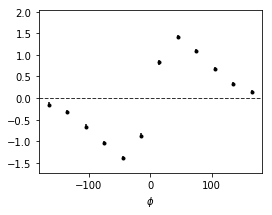

In [3]:
plotter.plot_phi(phi, value, error)

We can also pass in our own parameters and model.

In [4]:
model = physics_model.BeamSpinAsymmetryModel() 
parameters = np.array([0.05, 0.0, 0.0])
phi, value, error = generator.generate(model=model, 
                                       parameters=parameters,
                                      error=0.01, n_values=16)

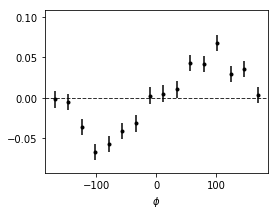

In [5]:
plotter.plot_phi(phi, value, error)

### Perform fits
This fit should be relatively easy, due to the number of bins and the size of the error compared to the size of the asymmetry.

In [6]:
# Parameter bounds, these are physically motivated
bounds = [[-1, 1], [-1, 1], [-1, 1]]
x0 = [0.0, 0.0, 0.0]

In [7]:
# we're going to showcase several different fitters 
fitters = {}

fitters['single'] = fitter.SingleFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds)
fitters['regularized'] = fitter.SingleRegularizedFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds, 
                                        penalty=0.1)
fitters['replica'] = fitter.ReplicaFitter(model=model, 
                                        loss_function=loss.chi2, 
                                        bounds=bounds,
                                         n_replicas=100, 
                                         n_cores=4)

In [8]:
for name in fitters.keys():
    fitters[name].fit(phi, value, error)

100%|██████████| 25/25 [00:02<00:00, 10.95it/s]


For now, the results of the fit are stored inside the fitter.

In [9]:
for name in fitters.keys():
    print('loss = %.3f, quality = %.3f' % (fitters[name].loss, fitters[name].quality))

loss = 2219.938, quality = 0.000
loss = 27.515, quality = 0.036
loss = 15.060, quality = 0.520


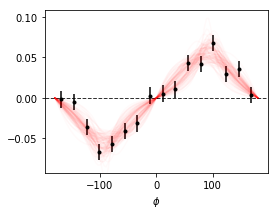

In [10]:
plotter.plot_replicas(phi, value, error, model, fitters['replica'].fit_container)

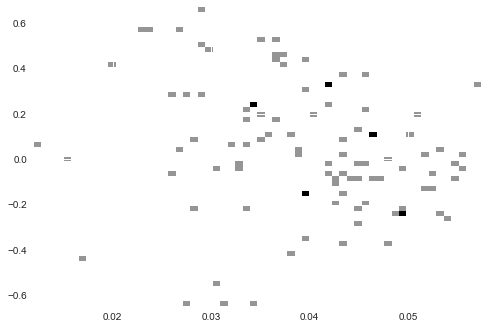

In [31]:
plt.hist2d(fitters['replica'].fit_container[:,0], 
           fitters['replica'].fit_container[:,1], 
           bins=60);

In [32]:
import seaborn as sns

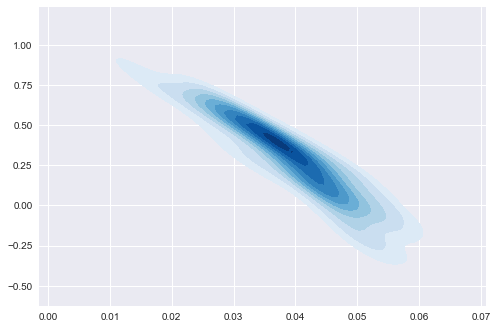

In [36]:
sns.kdeplot(fitters['replica'].fit_container[:,0], 
           fitters['replica'].fit_container[:,2], 
           shade=True, cmap='Blues',
           shade_lowest=False)